In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bone_marrow_transplant_children = fetch_ucirepo(id=565) 
  
# data (as pandas dataframes) 
X = bone_marrow_transplant_children.data.features 
y = bone_marrow_transplant_children.data.targets 
  
# metadata 
# print(bone_marrow_transplant_children.metadata) 
  
# variable information 
print(bone_marrow_transplant_children.variables) 


                    name     role         type demographic  \
0        Recipientgender  Feature       Binary      Gender   
1         Stemcellsource  Feature       Binary        None   
2               Donorage  Feature      Integer         Age   
3             Donorage35  Feature       Binary         Age   
4                   IIIV  Feature       Binary        None   
5            Gendermatch  Feature       Binary      Gender   
6               DonorABO  Feature  Categorical        None   
7           RecipientABO  Feature  Categorical        None   
8            RecipientRh  Feature       Binary        None   
9               ABOmatch  Feature       Binary        None   
10             CMVstatus  Feature  Categorical        None   
11              DonorCMV  Feature       Binary        None   
12          RecipientCMV  Feature       Binary        None   
13               Disease  Feature  Categorical        None   
14             Riskgroup  Feature       Binary        None   
15      

In [3]:
X_test = X.copy()

In [4]:
X.head()

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,aGvHDIIIIV,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,0,1.0,7.20,1.338760,5.38,35.0,19,51,32,999
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1,1.0,4.50,11.078295,0.41,20.6,16,37,1000000,163
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1,1.0,7.94,19.013230,0.42,23.4,23,20,1000000,435
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,0,NaN,4.25,29.481647,0.14,50.0,23,29,19,53
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1,1.0,51.85,3.972255,13.05,9.0,14,14,1000000,2043


In [145]:
y

,survival_status
0,0
1,1
2,1
3,1
4,0
...,...
182,1
183,1
184,0
185,1


In [146]:
y['survival_status']

0      0
1      1
2      1
3      1
4      0
      ..
182    1
183    1
184    0
185    1
186    0
Name: survival_status, Length: 187, dtype: int64

<AxesSubplot:xlabel='survival_status', ylabel='count'>

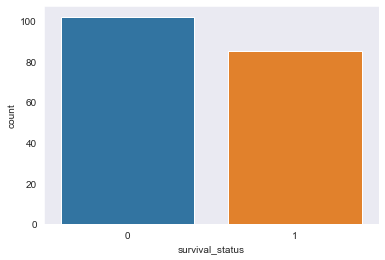

In [478]:
sns.countplot(x = y['survival_status'])

### No class imbalance problem

Make sure to write comments and give reasons and explanation about everything
1.Recognition of problem statement
2.choice of design(retrospective)
3.collection of data

Statistical analysis
1. 
2. Data preprocessing(treating null values, outliers, multicollinearity, correlation, transformation, skewness)
3. Data Analysis/visualization(examining each feature, important features(why,feature selection))
4. Model Building(different models, hyperparamter tuning?, cross validation, best model(based on r2 or rmse), learning curve(wrt sample size), )

####  linear model using all features and important features and validate with the feature selection done during visualization.
####  Will try to figure the problems with our data during preprocessing and keep a note of it; validate it during analysis and then make changes
PCA?, kurtosis?

In [479]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Recipientgender       187 non-null    int64  
 1   Stemcellsource        187 non-null    int64  
 2   Donorage              187 non-null    float64
 3   Donorage35            187 non-null    int64  
 4   IIIV                  187 non-null    int64  
 5   Gendermatch           187 non-null    int64  
 6   DonorABO              187 non-null    int64  
 7   RecipientABO          186 non-null    float64
 8   RecipientRh           185 non-null    float64
 9   ABOmatch              186 non-null    float64
 10  CMVstatus             171 non-null    float64
 11  DonorCMV              185 non-null    float64
 12  RecipientCMV          173 non-null    float64
 13  Disease               187 non-null    object 
 14  Riskgroup             187 non-null    int64  
 15  Txpostrelapse         1

In [480]:
print(bone_marrow_transplant_children.variables) 

                    name     role         type demographic  \
0        Recipientgender  Feature       Binary      Gender   
1         Stemcellsource  Feature       Binary        None   
2               Donorage  Feature      Integer         Age   
3             Donorage35  Feature       Binary         Age   
4                   IIIV  Feature       Binary        None   
5            Gendermatch  Feature       Binary      Gender   
6               DonorABO  Feature  Categorical        None   
7           RecipientABO  Feature  Categorical        None   
8            RecipientRh  Feature       Binary        None   
9               ABOmatch  Feature       Binary        None   
10             CMVstatus  Feature  Categorical        None   
11              DonorCMV  Feature       Binary        None   
12          RecipientCMV  Feature       Binary        None   
13               Disease  Feature  Categorical        None   
14             Riskgroup  Feature       Binary        None   
15      

All features are int or float types except 'Disease'

In [481]:
%pprint

Pretty printing has been turned ON


In [482]:
# Number of null values across columns
null_Col = [(i, X[i].isnull().sum()) for i in X.columns if X[i].isnull().sum() > 0]
pd.DataFrame(null_Col, columns=['Features', 'Null values'])

,Features,Null values
0,RecipientABO,1
1,RecipientRh,2
2,ABOmatch,1
3,CMVstatus,16
4,DonorCMV,2
5,RecipientCMV,14
6,Antigen,1
7,Allele,1
8,extcGvHD,31
9,CD3dCD34,5


In [483]:
# Number of rows containing null values
sum(X.isnull().sum(axis=1)>0)
# we will lose a big amount of data if we drop rows

45

# Univariate analysis

For better understanding dividing the data into 3 groups based of recipient, donor and disease

In [484]:
x_Donor = X[['Donorage', 'Donorage35', 'DonorCMV', 'DonorABO']]

In [485]:
x_Recipient = X[['Recipientgender', 'Recipientage', 'Recipientage10', 'Recipientageint', 'RecipientABO', 
                'RecipientRh', 'RecipientCMV', 'Rbodymass']]

In [486]:
# x_Disease = X[list(set(x_Donor.columns.append(x_Recipient.columns)).symmetric_difference(X.columns))]
x_Disease = X[['Disease', 'Diseasegroup']]

In [487]:
x_Don_Rec_Comp = X[['Gendermatch', 'ABOmatch', 'CMVstatus', 'HLAmatch', 'HLAmismatch', 'Antigen', 'Allele',
                   'HLAgrI', 'Riskgroup']]

In [488]:
x_Transplant = X[['Stemcellsource', 'Txpostrelapse', 'CD34kgx10d6', 'CD3dkgx10d8', 'CD3dCD34', 'ANCrecovery',
                 'PLTrecovery', 'IIIV', 'aGvHDIIIIV', 'time_to_aGvHD_III_IV', 'extcGvHD', 'survival_time', 
                 'Relapse']]

In [489]:
# X[list(set(x_Donor.columns.append([x_Recipient.columns, x_Disease.columns, x_Don_Rec_Comp.columns])).symmetric_difference(X.columns))].columns

### Donor 

In [490]:
x_Donor.describe()

,Donorage,Donorage35,DonorCMV,DonorABO
count,187.000000,187.000000,185.000000,187.000000
mean,33.472068,0.443850,0.389189,0.390374
std,8.271826,0.498171,0.488889,0.837632
min,18.646575,0.000000,0.000000,-1.000000
25%,27.039726,0.000000,0.000000,0.000000
50%,33.550685,0.000000,0.000000,0.000000
75%,40.117809,1.000000,1.000000,1.000000
max,55.553425,1.000000,1.000000,2.000000


### Donorage

In [491]:
### Donorage - Age of the donor at the time of hematopoietic stem cells apheresis
### Hematopoietic stem cells have the ability to develop into diff types of blood cells. Eg- RBCs, WBCs, platelets

# During the apheresis procedure, the donor is connected to a machine that separates blood components. 
# The machine draws blood from the donor's vein, and then it selectively collects and harvests the 
# hematopoietic stem cells. The remaining blood components, such as plasma and red blood cells, are 
# returned to the donor's circulation.

<AxesSubplot:xlabel='Donorage', ylabel='Count'>

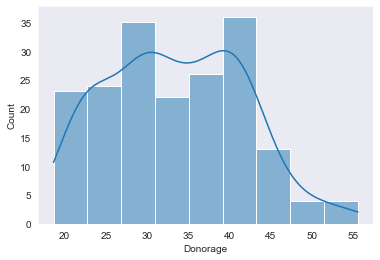

In [492]:
sns.histplot(x_Donor['Donorage'], kde=True) 

almost normal


### Donorage35

In [493]:
# Donorage35 - Donor age <35 = 0, Donor age >=35 = 1 ; Binary type
x_Donor['Donorage35'].value_counts()

0    104
1     83
Name: Donorage35, dtype: int64

Donor age < 35   : 104

Donor age >= 35  : 83


### DonorABO

In [494]:
# ABO blood group of the donor of hematopoietic stem cells (O=0, A=1, B=-1, AB=2)
x_Donor['DonorABO'].value_counts()

 0    73
 1    71
-1    28
 2    15
Name: DonorABO, dtype: int64

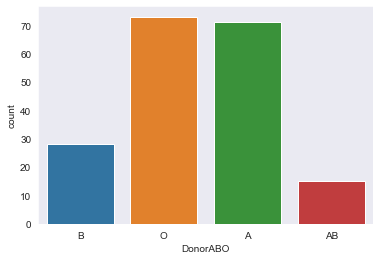

In [495]:
sns.countplot(x = x_Donor['DonorABO'])
plt.xticks([0, 1, 2, 3], ['B', 'O', 'A', 'AB'])
plt.show()

O-blood type = 73 ; A blood type = 71 ; B blood type = 28 ; AB blood type = 15
#### change to categorical type

### DonorCMV

In [496]:
### presence of cytomegalovirus infection in the donor of hematopoietic stem cells prior to transplantation

# The CMV status is important in transplantation because a CMV-negative recipient receiving an organ or stem cells
# from a CMV-positive donor is at risk of developing CMV infection after the transplant.

In [497]:
x_Donor['DonorCMV'].value_counts()

0.0    113
1.0     72
Name: DonorCMV, dtype: int64

In [498]:
x_Donor['DonorCMV'].dtype

dtype('float64')

##### 113 - CMV-negative donor ; 72 - CMV-positive donor
#### Contains 2 null values; Check if needed to convert dtype to int64

Change to categorical type - DonorABO

## Recipient group 

In [499]:
x_Recipient.describe()

,Recipientgender,Recipientage,Recipientage10,Recipientageint,RecipientABO,RecipientRh,RecipientCMV,Rbodymass
count,187.000000,187.000000,187.000000,187.000000,186.000000,185.000000,173.000000,185.000000
mean,0.598930,9.931551,0.470588,1.224599,0.274194,0.854054,0.578035,35.801081
std,0.491431,5.305639,0.500474,0.824904,0.938706,0.354010,0.495307,19.650922
min,0.000000,0.600000,0.000000,0.000000,-1.000000,0.000000,0.000000,6.000000
25%,0.000000,5.050000,0.000000,0.500000,-1.000000,1.000000,0.000000,19.000000
50%,1.000000,9.600000,0.000000,1.000000,0.000000,1.000000,1.000000,33.000000
75%,1.000000,14.050000,1.000000,2.000000,1.000000,1.000000,1.000000,50.600000
max,1.000000,20.200000,1.000000,2.000000,2.000000,1.000000,1.000000,103.400000


#### Recipient Gender 

In [500]:
# Male - 1, Female - 0
x_Recipient['Recipientgender'].value_counts()

1    112
0     75
Name: Recipientgender, dtype: int64

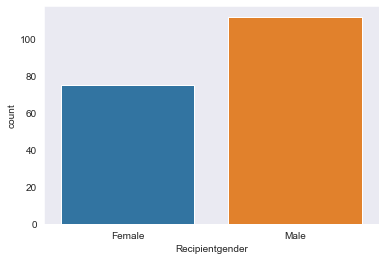

In [501]:
sns.countplot(x = x_Recipient['Recipientgender'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

Male Recipients - 112 ; Female Recipients - 75

#### Recipient Age 

<AxesSubplot:xlabel='Recipientage', ylabel='Count'>

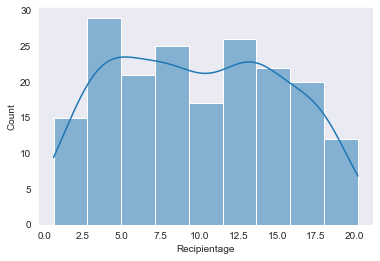

In [502]:
# Age of the recipient of hematopoietic stem cells at the time of transplantation
sns.histplot(x_Recipient['Recipientage'], kde = True)

#### Recipient Age 10 

In [503]:
# Recipient age <10 = 0, Recipient age>=10 = 1
x_Recipient['Recipientage10'].value_counts()

0    99
1    88
Name: Recipientage10, dtype: int64

Age>=10: 99  ; Age<10: 88

#### Recipient age int

In [504]:
# Recipient age in (0,5] = 0, (5, 10] = 1, (10, 20] = 2
x_Recipient['Recipientageint'].value_counts()

2    89
1    51
0    47
Name: Recipientageint, dtype: int64

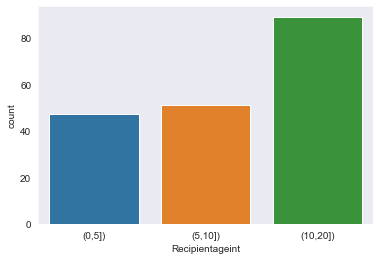

In [505]:
sns.countplot(x = x_Recipient['Recipientageint'])
plt.xticks([0, 1, 2], ['(0,5])', '(5,10])', '(10,20])'])
plt.show()

(0,5] - 47 ; (5,10] - 51 ; (10,20] - 89
#### convert to ordinal cat type?

### RecipientABO

In [506]:
# ABO blood group of the recipient of hematopoietic stem cells (O - 0, A=1, B=-1, AB=2)
x_Recipient['RecipientABO'].value_counts()

 1.0    75
-1.0    50
 0.0    48
 2.0    13
Name: RecipientABO, dtype: int64

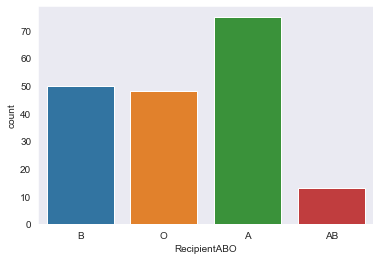

In [507]:
sns.countplot(x = x_Recipient['RecipientABO'])
plt.xticks([0, 1, 2, 3], ['B', 'O', 'A', 'AB'])
plt.show()

O-blood type = 48 ; A blood type = 75 ; B blood type = 28 ; AB blood type = 15
#### change to categorical type and 1 null value

### RecipientRh 

In [508]:
# Presence of the Rh factor on recipient's red blood cells ('+ve' = 1, '-ve' = 0)
# The Rh factor is a protein that can be present on the surface of red blood cells.
# Blood is classified into two main Rh factor types:

# Rh-Positive (Rh+): If the Rh factor is present on the red blood cells.
# Rh-Negative (Rh-): If the Rh factor is absent.
    
### A person with Rh-positive blood can receive blood or transplants from a donor with either Rh+ve or Rh-ve blood.
### A person with Rh-ve blood should ideally receive blood or transplants from a donor with Rh-ve blood to avoid potential complications.

# In the context of hematopoietic stem cell transplantation, knowing both the ABO blood group and the Rh factor of 
# the donor and recipient is crucial for a successful transplant and to minimize the risk of complications. Matching
# these factors helps ensure that the donor's cells are accepted by the recipient's body without triggering an immune
# response.

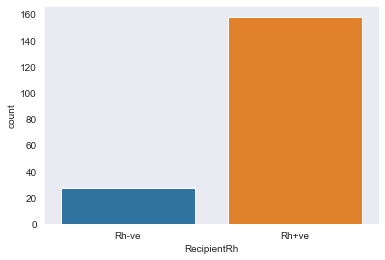

In [509]:
sns.countplot(x = x_Recipient['RecipientRh'])
plt.xticks([0, 1], ['Rh-ve', 'Rh+ve'])
plt.show()

### 2 null values

### From internet - check during analysis
A person with Rh-positive blood can receive blood or transplants from a donor with either Rh+ve or Rh-ve blood.

A person with Rh-ve blood should ideally receive blood or transplants from a donor with Rh-ve blood to avoid potential complications.

knowing both the ABO blood group and the Rh factor of the donor and recipient is crucial for a successful transplant and to minimize the risk of complications.

### Recipient CMV 

The recipients immune system is suprressed due to the transplant procedure and immunosuppressive medications,
so a recipient with CMV+ve has a higher chance of CMV reactivation which may affect the lungs, liver etc.

In [510]:
# Presence of cytomegalovirus infection in the recipient of hematopoietic stem cells prior to
# transplantation (presence - 1, absence - 0)

x_Recipient['RecipientCMV'].value_counts()
# CMV+ - 100 recipients have a current or past infection with CMV infection 

1.0    100
0.0     73
Name: RecipientCMV, dtype: int64

### 14 null values

### Recipient_body_mass

<AxesSubplot:xlabel='Rbodymass', ylabel='Count'>

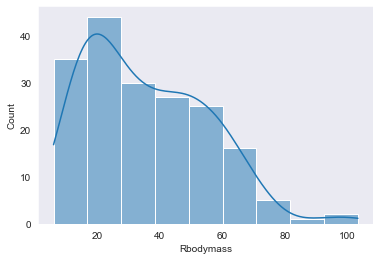

In [511]:
# Body mass of the recipient of hematopoietic stem cells at the time of transplantation
sns.histplot(x_Recipient['Rbodymass'], kde = True)

### skewed; 2 null values

Change to categorical type - Recipientageint, RecipientABO


# Disease group 

### Disease type

In [512]:
# Type of disease (ALL,AML,chronic,nonmalignant,lymphoma)
# malignant disorders (i.a. acute lymphoblastic leukemia, acute myelogenous leukemia, 
#                      chronic myelogenous leukemia, myelodysplastic syndrome)
# nonmalignant cases (i.a. severe aplastic anemia, Fanconi anemia, with X-linked adrenoleukodystrophy).

In [513]:
x_Disease['Disease'].value_counts()

ALL             68
chronic         45
AML             33
nonmalignant    32
lymphoma         9
Name: Disease, dtype: int64

<AxesSubplot:xlabel='Disease', ylabel='count'>

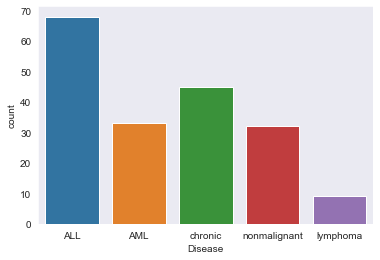

In [514]:
sns.countplot(x = x_Disease['Disease'])

"ALL", "AML", "chronic", and "lymphoma" are types of malignant diseases. 
#### should we combine them?

In [515]:
x_Disease['Disease'].dtype

dtype('O')

### Disease Group

#### Malignant
Malignant hematologic disorders involve the abnormal growth and proliferation of blood cells, 
typically in a way that is uncontrolled and can lead to the invasion of tissues and organs.

Examples:
Leukemia: Malignant disorder characterized by the rapid proliferation of abnormal white blood cells. 
Ex- acute lymphoblastic leukemia (ALL) and acute myeloid leukemia (AML).

Lymphoma: Malignant tumor arising from lymphocytes, a type of white blood cell. Ex- Hodgkin lymphoma and non-Hodgkin lymphoma.

#### Non malignant(in short- benign)
Non-malignant hematologic disorders involve abnormalities in blood cells or blood-forming tissues, but they do not exhibit the uncontrolled proliferation and invasion seen in malignant disorders.

Sickle Cell Disease: A genetic disorder affecting red blood cells, causing them to become misshapen and leading to various complications.

Anemia: A condition characterized by a decrease in the number of red blood cells or a decrease in the amount of hemoglobin, leading to reduced oxygen-carrying capacity.

Thrombocytopenia: A condition characterized by a low platelet count, which can result in an increased risk of bleeding.

Hemophilia: A genetic disorder that impairs the blood's ability to clot properly, leading to excessive bleeding.

In [516]:
# Type of disease (malignant - 1, nonmalignant - 0)
x_Disease['Diseasegroup'].value_counts()

1    155
0     32
Name: Diseasegroup, dtype: int64

The data set describes pediatric patients with several hematologic diseases: malignant disorders (i.a. acute lymphoblastic leukemia, acute myelogenous leukemia, chronic myelogenous leukemia, myelodysplastic syndrome) and nonmalignant cases (i.a. severe aplastic anemia, Fanconi anemia, with X-linked adrenoleukodystrophy). All patients were subject to the unmanipulated allogeneic unrelated donor hematopoietic stem cell transplantation. 

## Donor-Recipient

In [517]:
x_Don_Rec_Comp.describe()

,Gendermatch,ABOmatch,CMVstatus,HLAmatch,HLAmismatch,Antigen,Allele,HLAgrI,Riskgroup
count,187.000000,186.000000,171.000000,187.000000,187.000000,186.000000,186.000000,187.000000,187.000000
mean,0.171123,0.720430,1.508772,0.673797,0.149733,-0.075269,-0.247312,1.219251,0.368984
std,0.377627,0.449999,1.129125,0.793460,0.357767,0.999855,0.890259,1.719607,0.483825
min,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000
50%,0.000000,1.000000,2.000000,0.000000,0.000000,-0.500000,-0.500000,0.000000,0.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,3.000000,1.000000,2.000000,3.000000,7.000000,1.000000


### Gender match?
Compatibility of the donor and recipient according to their gender (Female to Male - 1, Other - 0)

In [518]:
x_Don_Rec_Comp['Gendermatch'].value_counts()

0    155
1     32
Name: Gendermatch, dtype: int64

In [519]:
#  1 -> if the donor is female and recipient is male, then they are compatible for transplantation ??
#  0 -> incompatible in other cases

### ABOmatch
1 (Matched): Indicates compatibility, meaning the donor and recipient share the same or compatible ABO blood groups.

0 (Mismatched): Indicates incompatibility, meaning there is a mismatch between the ABO blood groups of the donor and recipient.

In [520]:
x_Don_Rec_Comp['ABOmatch'].value_counts()

1.0    134
0.0     52
Name: ABOmatch, dtype: int64

### CMV Status

##### CMV_status - Serological compatibility of the donor and the recipient of hematopoietic stem cells according to cytomegalovirus infection prior to transplantation (the higher the value, the lower the compatibility)

Higher Values: Serologically incompatible. This could mean that the CMV infection status of the donor and recipient is more mismatched or incompatible. It can increase the risk of CMV reactivation in the recipient post-transplant.

Lower Values: These suggest a higher degree of serological compatibility between the donor and recipient in terms of CMV status. A lower value may indicate a more matched or compatible CMV status.

In [521]:
x_Don_Rec_Comp['CMVstatus'].value_counts()

2.0    57
0.0    48
3.0    39
1.0    27
Name: CMVstatus, dtype: int64

<AxesSubplot:xlabel='CMVstatus', ylabel='count'>

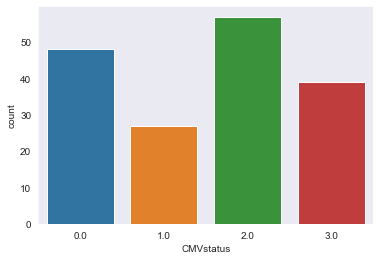

In [522]:
sns.countplot(x = x_Don_Rec_Comp['CMVstatus'])

In [523]:
# CMV status inversely prop to serological compatibility

### HLAmatch

HLAmatch Variable:
0 (10/10): Indicates perfect compatibility where all 10 alleles/antigens are matched between the donor and recipient based on the ALL international BFM SCT 2008 criteria.

1 (9/10): Indicates a slightly lower level of compatibility where 9 out of 10 alleles/antigens match between the donor and recipient.

2 (8/10): Indicates a further reduction in compatibility where 8 out of 10 alleles/antigens match.

3 (7/10): Indicates the lowest level of compatibility in this scale, with only 7 out of 10 alleles/antigens matching between the donor and recipient.

In [1282]:
x_Don_Rec_Comp['HLAmatch'].value_counts()

0    94
1    65
2    23
3     5
Name: HLAmatch, dtype: int64

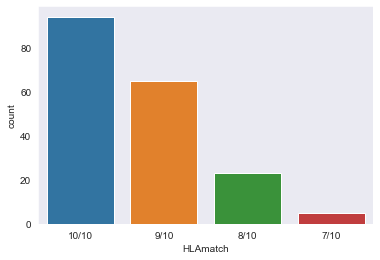

In [524]:
sns.countplot(x = x_Don_Rec_Comp['HLAmatch'])
plt.xticks([0, 1, 2, 3], ['10/10', '9/10', '8/10', '7/10'])
plt.show()

Significance in Hematopoietic Stem Cell Transplantation:

HLA matching is a critical factor in hematopoietic stem cell transplantation to reduce the risk of graft-versus-host disease (GVHD) and improve overall transplant outcomes.

Perfect Match (10/10): This is considered highly desirable, and it represents optimal compatibility between the donor and recipient in terms of HLA antigens, minimizing the risk of complications.

Slight Mismatch (9/10, 8/10): While not perfect, these levels of compatibility may still be acceptable, and transplantation can proceed. The specific decision may depend on various factors, including the urgency of the transplant and the availability of suitable donors.

Lower Compatibility (7/10): This level of compatibility may indicate a higher risk of complications, and transplant teams may carefully weigh the benefits and risks before proceeding.

### HLAmismatch

The variable "hlamismatch" is a binary indicator used to represent the HLA (human leukocyte antigen) compatibility between the donor and recipient

hlamismatch Variable:
0 (HLA matched): This code indicates that the donor and recipient are HLA-matched. In other words, their HLA profiles are compatible or closely match.

1 (HLA mismatched): This code indicates that there is an HLA mismatch between the donor and recipient. Their HLA profiles are not fully compatible.

In [525]:
x_Don_Rec_Comp['HLAmismatch'].value_counts()

0    159
1     28
Name: HLAmismatch, dtype: int64

Significance in Hematopoietic Stem Cell Transplantation:

HLA matching is a crucial consideration in hematopoietic stem cell transplantation to reduce the risk of graft-versus-host disease (GVHD) and improve overall transplant outcomes.

HLA Matched (0): This is considered desirable, and it represents optimal compatibility between the donor and recipient in terms of HLA antigens, minimizing the risk of complications.

HLA Mismatched (1): This indicates a situation where there is an HLA mismatch between the donor and recipient. HLA mismatches can lead to immune reactions and increase the risk of GVHD.

Graft-Versus-Host Disease (GVHD): Mismatched HLA antigens can trigger an immune response in which the transplanted cells attack the recipient's tissues. This condition is known as GVHD and can be severe. Matching HLA antigens helps reduce the risk of GVHD.

Graft Rejection: Mismatched HLA can lead to the recipient's immune system recognizing the transplanted cells as foreign and rejecting them. Matching HLA helps minimize the risk of graft rejection.

### Antigen

The variable "antigen" is used to represent the number of differences in antigens between the donor and the recipient

-1 : No difference in antigens between the donor and recipient.

0 : one difference ; 1 : two differences ; 2 : three differences

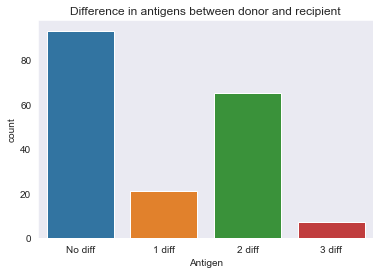

In [526]:
sns.countplot(x = x_Don_Rec_Comp['Antigen'])
plt.title('Difference in antigens between donor and recipient')
plt.xticks([0, 1, 2, 3], ['No diff', '1 diff', '2 diff', '3 diff'])
plt.show()

HLA antigens are proteins on the surface of cells that play a key role in the immune system's recognition of self and non-self. They are crucial for tissue compatibility, and in the context of bone marrow transplantation, matching HLA between the donor and recipient is essential to reduce the risk of rejection and graft-versus-host disease (GVHD).

### Allele
The term "allele" refers to different forms of a gene that occupy the same position or locus on a chromosome.

-1 = No allele differences between the donor and the recipient.

0 = one diff ; 1 = two diff ; 2 = three diff ; 3 = four diff

The "allele" variable provides a quantitative measure of the allele differences between the donor and the recipient.

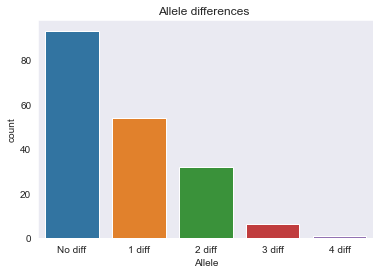

In [527]:
sns.countplot(x = x_Don_Rec_Comp['Allele'])
plt.title('Allele differences ')
plt.xticks([0, 1, 2, 3, 4], ['No diff', '1 diff', '2 diff', '3 diff', '4 diff'])
plt.show()

No Differences (-1): This scenario is ideal, indicating an exact match in alleles, which minimizes the risk of complications, particularly graft-versus-host disease (GVHD).

## HLAgrI	
The variable "HLA_group_1" describes the difference type between the donor and the recipient in the context of human leukocyte antigen (HLA) matching.

HLA matched - 0 : All antigens and alleles are identical.

1 :there is a difference between the donor and recipient, but the difference is limited to "one HLA antigen".

2 : there is a difference between the donor and recipient, specifically in "one allele of an HLA antigen".

3 : there is a difference only in "DRB1" cell of the HLA system between the donor and recipient.

4 : two differences between the donor and recipient which involve "two alleles, two antigens, or one allele and one antigen".

5 : there are two differences between the donor and recipient, involving "two antigens and one allele".

7 : This category indicates that there is a general "mismatch" between the donor and recipient in terms of HLA antigens.

In [528]:
x_Don_Rec_Comp['HLAgrI'].value_counts()

0    94
1    42
4    19
2    14
3     9
7     5
5     4
Name: HLAgrI, dtype: int64

## change 7 to 6?

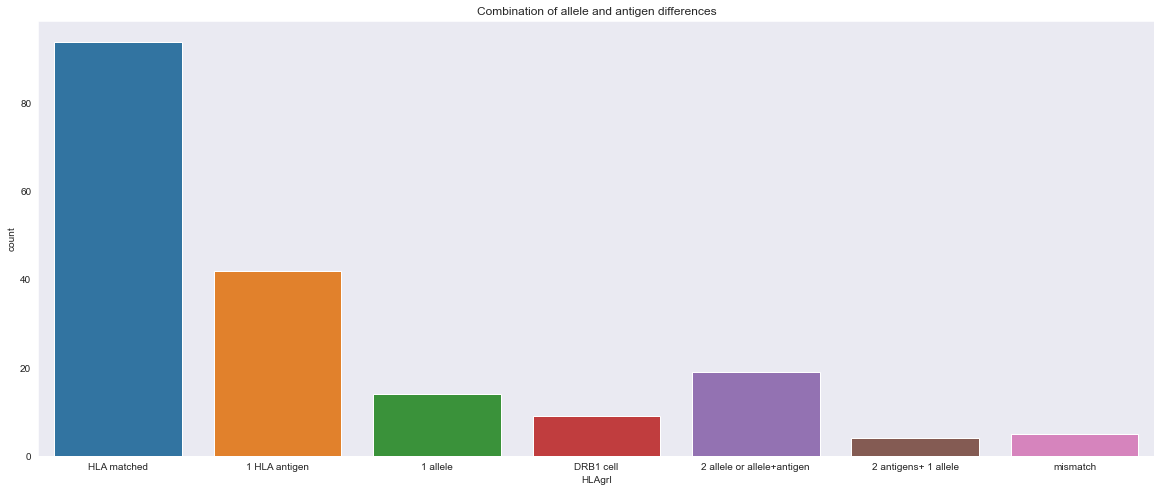

In [529]:
plt.figure(figsize=(20,8))
sns.countplot(x = x_Don_Rec_Comp['HLAgrI'])
plt.title('Combination of allele and antigen differences')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['HLA matched', '1 HLA antigen', '1 allele', 'DRB1 cell',
                                   '2 allele or allele+antigen', '2 antigens+ 1 allele', 'mismatch'])
plt.show()

### risk_group 
High risk - 1, Low risk - 0

In [530]:
x_Don_Rec_Comp['Riskgroup'].value_counts()

0    118
1     69
Name: Riskgroup, dtype: int64

change to categorical types - CMVstatus, HLAmatch, antigen, Allele, HLAgrI, 

## x_Transplant

In [531]:
x_Transplant.head()

,Stemcellsource,Txpostrelapse,CD34kgx10d6,CD3dkgx10d8,CD3dCD34,ANCrecovery,PLTrecovery,IIIV,aGvHDIIIIV,time_to_aGvHD_III_IV,extcGvHD,survival_time,Relapse
0,1,0,7.20,5.38,1.338760,19,51,1,0,32,1.0,999,0
1,0,0,4.50,0.41,11.078295,16,37,1,1,1000000,1.0,163,1
2,0,0,7.94,0.42,19.013230,23,20,1,1,1000000,1.0,435,1
3,0,0,4.25,0.14,29.481647,23,29,1,0,19,NaN,53,0
4,1,0,51.85,13.05,3.972255,14,14,0,1,1000000,1.0,2043,0


### Stemcell source
Source of hematopoietic stem cells (Peripheral blood - 1, Bone marrow - 0)

Peripheral blood stem cell transplantation involves collecting stem cells from the bloodstream through a process called apheresis.

Indicates that the hematopoietic stem cells were sourced directly from the bone marrow.

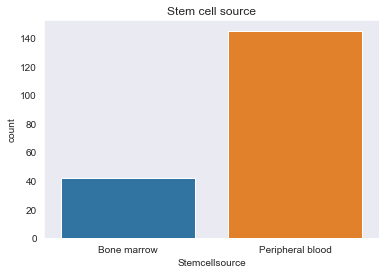

In [532]:
sns.countplot(x = x_Transplant['Stemcellsource'])
plt.title('Stem cell source')
plt.xticks([0, 1], ['Bone marrow', 'Peripheral blood'])
plt.show()

### Txpostrelapse
describes whether a second bone marrow transplantation has been performed after a relapse has occurred.(No - 0; Yes - 1)

Relapse refers to the recurrence of the underlying disease after the initial transplantation.

In [533]:
x_Transplant['Txpostrelapse'].value_counts()

0    164
1     23
Name: Txpostrelapse, dtype: int64

### CD34kgx10d6
CD34+ cell dose per kilogram (kg) of recipient body weight, expressed in millions (10^6) of CD34+ cells

CD34 is a cell surface antigen found on hematopoietic stem cells, including those in the bone marrow and peripheral blood.

If the term is specified as "CD34kgx10d6 = 5," it means there are 5 million CD34+ cells for every kilogram of the recipient's body weight.

<AxesSubplot:xlabel='CD34kgx10d6', ylabel='Count'>

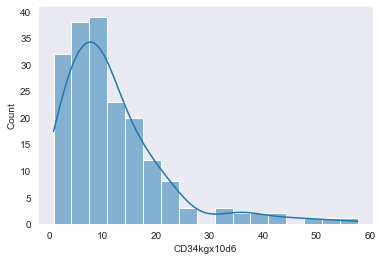

In [534]:
sns.histplot(x = x_Transplant['CD34kgx10d6'], kde = True)
# highly skewed

## CD3dkgx10d8
CD3+ cell dose per kilogram (kg) of recipient body weight, expressed in hundreds of millions (10^8) of CD3+ cells.

CD3 is a cell surface antigen found on T cells, which are a type of immune cell.

If the term is specified as "CD3dkgx10d8 = 3," it means there are 3 hundred million (300,000,000) CD3+ cells for every kilogram of the recipient's body weight.

<AxesSubplot:xlabel='CD3dkgx10d8', ylabel='Count'>

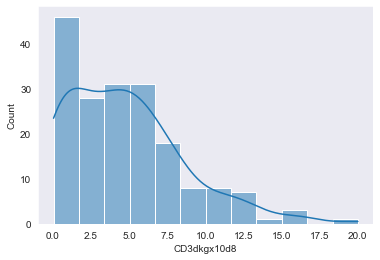

In [535]:
sns.histplot(x_Transplant['CD3dkgx10d8'], kde = True)
# highly skewed

## CD3dCD34
ratio CD3+ cell to CD34+ cells

<AxesSubplot:xlabel='CD3dCD34', ylabel='Count'>

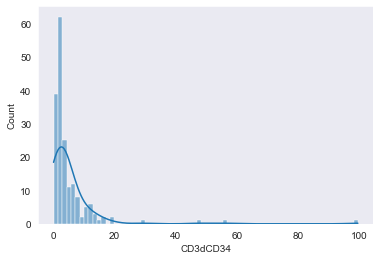

In [536]:
sns.histplot(x_Transplant['CD3dCD34'], kde = True)
# very highly skewed

## ANCrecovery
It represents the time it takes for neutrophil recovery to a certain threshold(0.5 billion neutrophils per liter) after hematopoietic stem cell(bone marrow) transplantation.

ANC stands for Absolute Neutrophil Count, which is a measure of the number of neutrophils in a person's blood.

Neutrophils are a type of white blood cell that plays a crucial role in the immune system, particularly in defending against bacterial and fungal infections.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ANCrecovery', ylabel='Density'>

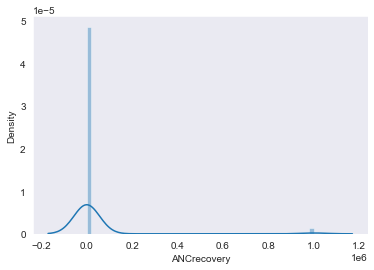

In [537]:
sns.distplot(x_Transplant['ANCrecovery'], kde = True)

### PLTrecovery
It represents the time it takes for platelets recovery to a certain threshold(50,000 platelets per cubic millimeter) after hematopoietic stem cell(bone marrow) transplantation.

 Platelets are blood cells that play a crucial role in blood clotting and preventing excessive bleeding.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PLTrecovery', ylabel='Density'>

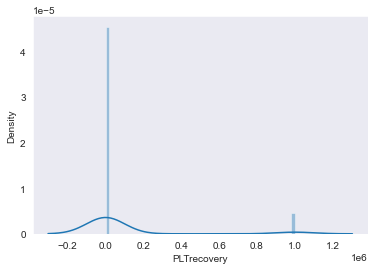

In [538]:
sns.distplot(x_Transplant['PLTrecovery'])

## IIIV
Development of acute graft versus host disease stage II or III or IV (Yes - 1, No - 0)

Acute Graft-versus-Host Disease (aGVHD):

aGVHD is a common complication that can occur after allogeneic hematopoietic stem cell transplantation, where donor cells (graft) attack the recipient's tissues. The severity of aGVHD is often classified into stages, with stages II, III, and IV indicating increasing severity.

Staging of aGVHD:

Stage II: Involves skin rash affecting more than 25% of the body surface area or liver enzyme abnormalities.

Stage III: Involves severe skin rash or involvement of the gastrointestinal tract.

Stage IV: Represents the most severe form of aGVHD, often with involvement of multiple organs.

There are 2 forms of GVHD:

 Acute GVHD occurs within 100 days of transplant. The symptoms
of acute GVHD may be mild or severe.

 Chronic GVHD develops after 100 days. If you do not develop
acute GVHD, it is less likely that you will develop chronic GVHD.

In [539]:
x_Transplant['IIIV'].value_counts()

1    112
0     75
Name: IIIV, dtype: int64

## aGvHDIIIIV
Development of acute graft versus host disease stage III or IV (Yes - 0, No - 1)

In [540]:
x_Transplant['aGvHDIIIIV'].value_counts()

1    147
0     40
Name: aGvHDIIIIV, dtype: int64

## time_to_aGvHD_III_IV
Time to the development of acute graft versus host disease stage III or IV after transplantation

<AxesSubplot:xlabel='time_to_aGvHD_III_IV', ylabel='Count'>

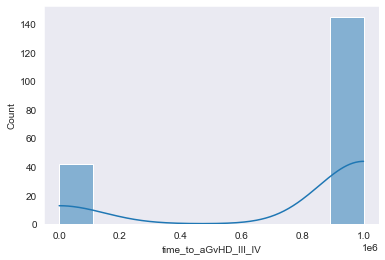

In [541]:
sns.histplot(x_Transplant['time_to_aGvHD_III_IV'], kde = True)

In [542]:
%pprint

Pretty printing has been turned OFF


In [543]:
set(x_Transplant['time_to_aGvHD_III_IV'])

{10, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 32, 33, 34, 36, 42, 49, 51, 54, 55, 58, 62, 1000000, 99, 100}

## extcGvHD - Chronic Graft-versus-Host Disease
(Yes - 0, No - 1)

Acute classic GVHD: Presents within 100 days of transplantation with classical clinical features of acute GVHD.

chronic GVHD: Presents after 100 days of transplant with classic clinical features of chronic GvHD

In [544]:
x_Transplant['extcGvHD'].value_counts()

1.0    128
0.0     28
Name: extcGvHD, dtype: int64

## Relapse 
Relapse indicates that the disease has returned or persisted after the transplantation, and it may necessitate further medical interventions.



In [545]:
# Reoccurrence of the disease (No - 0, Yes - 1)
x_Transplant['Relapse'].value_counts()

0    159
1     28
Name: Relapse, dtype: int64

## Survival time
Time of observation (if alive): For individuals who are still alive at the time of data collection, the "survival_time" represents the duration of time they have been observed since a specific reference point.

Time to event (if dead): For individuals who have experienced the event of interest (such as death), the "survival_time" represents the duration from the reference point to the occurrence of the event.

<AxesSubplot:xlabel='survival_time', ylabel='Count'>

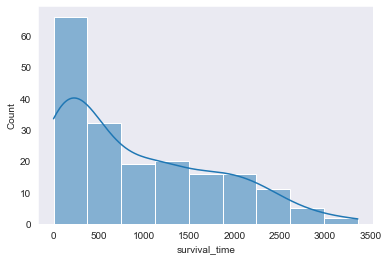

In [546]:
sns.histplot(x_Transplant['survival_time'], kde = True)

# Preprocessing

<Axes: xlabel='survival_status', ylabel='count'>

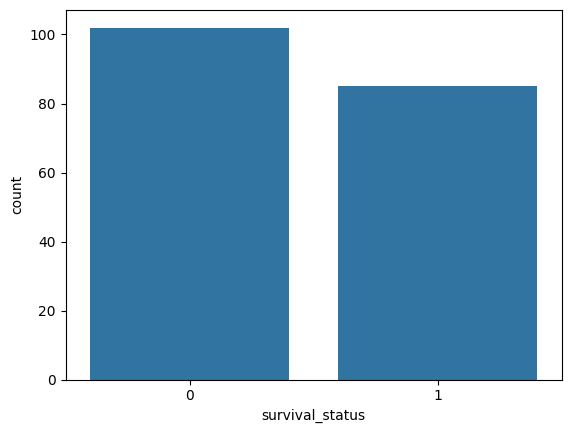

In [5]:
sns.countplot(x = y['survival_status'])

class imbalance problem

In [6]:
# checking for duplicate rows
X.duplicated().sum()

0

In [7]:
X1 = X.copy()

### Correcting data types 

In [8]:
c1 = ['CMVstatus', 'HLAmatch', 'Antigen', 'Allele', 'HLAgrI', 'Recipientageint', 'RecipientABO', 'Disease', 'DonorABO',
     'Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV', 'Gendermatch', 'RecipientRh', 'ABOmatch', 'DonorCMV',
     'RecipientCMV', 'Riskgroup', 'Txpostrelapse', 'Diseasegroup', 'HLAmismatch', 'Recipientage10', 'Relapse',
     'aGvHDIIIIV', 'extcGvHD']
X1[c1] = X1[c1].astype('category')

In [9]:
X1[c1].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CMVstatus        171 non-null    category
 1   HLAmatch         187 non-null    category
 2   Antigen          186 non-null    category
 3   Allele           186 non-null    category
 4   HLAgrI           187 non-null    category
 5   Recipientageint  187 non-null    category
 6   RecipientABO     186 non-null    category
 7   Disease          187 non-null    category
 8   DonorABO         187 non-null    category
 9   Recipientgender  187 non-null    category
 10  Stemcellsource   187 non-null    category
 11  Donorage35       187 non-null    category
 12  IIIV             187 non-null    category
 13  Gendermatch      187 non-null    category
 14  RecipientRh      185 non-null    category
 15  ABOmatch         186 non-null    category
 16  DonorCMV         185 non-null    category
 1

ALL, AML, chronic, lymphoma are types of malignant diseases.

In this case, disease and disease group will be same. 

Dropping Disease feature.

In [10]:
X1.drop(columns=['Disease'], inplace = True)

## Dealing with null values

In [11]:
# Amount of Null values across each feature
null_Col = [(i, X[i].isnull().sum()) for i in X.columns if X[i].isnull().sum() > 0]
pd.DataFrame(null_Col, columns=['Features', 'Null values']).set_index('Features').transpose()

Features,RecipientABO,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Antigen,Allele,extcGvHD,CD3dCD34,CD3dkgx10d8,Rbodymass
Null values,1,2,1,16,2,14,1,1,31,5,5,2


In [12]:
# dividing the dataset into categhorical and numerical types
X_cat = X1.select_dtypes(include="category")
X_num = X1.select_dtypes(include="number")

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [14]:
# Imputing null values of numerical features using a RandomForestRegressor model
imputer = IterativeImputer(RandomForestRegressor(), max_iter=10, random_state=0)
X1[X_num.columns] = pd.DataFrame(imputer.fit_transform(X_num), columns = X_num.columns)

In [15]:
X1[X_num.columns].isnull().sum() # Checking for null values across numerical features

Donorage                0
Recipientage            0
CD34kgx10d6             0
CD3dCD34                0
CD3dkgx10d8             0
Rbodymass               0
ANCrecovery             0
PLTrecovery             0
time_to_aGvHD_III_IV    0
survival_time           0
dtype: int64

In [16]:
X_num.head()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time
0,22.830137,9.6,7.20,1.338760,5.38,35.0,19,51,32,999
1,23.342466,4.0,4.50,11.078295,0.41,20.6,16,37,1000000,163
2,26.394521,6.6,7.94,19.013230,0.42,23.4,23,20,1000000,435
3,39.684932,18.1,4.25,29.481647,0.14,50.0,23,29,19,53
4,33.358904,1.3,51.85,3.972255,13.05,9.0,14,14,1000000,2043


In [17]:
X_cat.head()

,Recipientgender,Stemcellsource,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,CMVstatus,...,HLAmatch,HLAmismatch,Antigen,Allele,HLAgrI,Recipientage10,Recipientageint,Relapse,aGvHDIIIIV,extcGvHD
0,1,1,0,1,0,1,1.0,1.0,0.0,3.0,...,0,0,-1.0,-1.0,0,0,1,0,0,1.0
1,1,0,0,1,0,-1,-1.0,1.0,0.0,0.0,...,0,0,-1.0,-1.0,0,0,0,1,1,1.0
2,1,0,0,1,0,-1,-1.0,1.0,0.0,2.0,...,0,0,-1.0,-1.0,0,0,1,1,1,1.0
3,0,0,1,1,0,1,2.0,1.0,1.0,1.0,...,0,0,-1.0,-1.0,0,1,2,0,0,NaN
4,0,1,0,0,0,1,2.0,0.0,1.0,0.0,...,1,0,1.0,0.0,1,0,0,0,1,1.0


In [18]:
X_cat.isnull().sum() # Null values in categorical variables

Recipientgender     0
Stemcellsource      0
Donorage35          0
IIIV                0
Gendermatch         0
DonorABO            0
RecipientABO        1
RecipientRh         2
ABOmatch            1
CMVstatus          16
DonorCMV            2
RecipientCMV       14
Riskgroup           0
Txpostrelapse       0
Diseasegroup        0
HLAmatch            0
HLAmismatch         0
Antigen             1
Allele              1
HLAgrI              0
Recipientage10      0
Recipientageint     0
Relapse             0
aGvHDIIIIV          0
extcGvHD           31
dtype: int64

Nominal - RecipientABO(1)

Ordinal - CMVstatus(16), Antigen(1), Allele(1), 

Binary - RecipientRh(2), ABOmatch(1), DonorCMV(2), RecipientCMV(14), extcGvHD(31)

In [19]:
# First deal with features with low null values
# imputing using mode
from sklearn.impute import SimpleImputer
imputer_cat_low = SimpleImputer(strategy='most_frequent')
Col2 = ['RecipientABO', 'Antigen', 'Allele', 'RecipientRh', 'ABOmatch', 'DonorCMV']
X1[Col2] = imputer_cat_low.fit_transform(X1[Col2])

In [20]:
X1.isnull().sum()

Recipientgender          0
Stemcellsource           0
Donorage                 0
Donorage35               0
IIIV                     0
Gendermatch              0
DonorABO                 0
RecipientABO             0
RecipientRh              0
ABOmatch                 0
CMVstatus               16
DonorCMV                 0
RecipientCMV            14
Riskgroup                0
Txpostrelapse            0
Diseasegroup             0
HLAmatch                 0
HLAmismatch              0
Antigen                  0
Allele                   0
HLAgrI                   0
Recipientage             0
Recipientage10           0
Recipientageint          0
Relapse                  0
aGvHDIIIIV               0
extcGvHD                31
CD34kgx10d6              0
CD3dCD34                 0
CD3dkgx10d8              0
Rbodymass                0
ANCrecovery              0
PLTrecovery              0
time_to_aGvHD_III_IV     0
survival_time            0
dtype: int64

In [21]:
#encoding of categorical variables other than columns with null values
X_Cat_Nominal = ['DonorABO', 'RecipientABO']
X_Cat_Ordinal = ['HLAmatch', 'Antigen', 'Allele', 'HLAgrI', 'Recipientageint']
X1 = pd.get_dummies(X1, columns=X_Cat_Nominal, drop_first=True)

In [22]:
# For ordinal categorical variables
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X1[X_Cat_Ordinal] = encoder.fit_transform(X1[X_Cat_Ordinal])

In [23]:
# Imputing features with high number of null values using a RandomForestClassifier
Col_rest = ['extcGvHD', 'CMVstatus', 'RecipientCMV']
imputer2 = IterativeImputer(RandomForestClassifier(), max_iter=10, random_state=0)
X1[Col_rest] = pd.DataFrame(imputer2.fit_transform(X1[Col_rest]), columns = Col_rest)

In [24]:
X_full = pd.concat([X_test, y], axis=1)

In [25]:
X_full[X_full['extcGvHD'].isna()][['time_to_aGvHD_III_IV', 'aGvHDIIIIV', 'extcGvHD']] 

,time_to_aGvHD_III_IV,aGvHDIIIIV,extcGvHD
3,19,0,NaN
6,18,0,NaN
7,22,0,NaN
16,1000000,1,NaN
27,16,0,NaN
32,36,0,NaN
41,1000000,1,NaN
43,1000000,1,NaN
58,1000000,1,NaN
63,1000000,1,NaN


So through imputer we are filling the NaN chronic GvHD with 1(no chronic). In this case, most of the recipients never experienced aGvHD_III_IV as "time_to_aGvHD_III_IV" is 1000000 for most of the cases and these are actually dead. So that means my classifier worked perfectly.

In [26]:
# Performing One hot encoding for nominal and binary categorical variables
X_binary = ['Recipientgender', 'Stemcellsource', 'Donorage35', 'IIIV', 'Gendermatch', 'Riskgroup', 'Txpostrelapse',
            'Diseasegroup', 'HLAmismatch', 'Recipientage10', 'Relapse', 'aGvHDIIIIV']
X1 = pd.get_dummies(X1, columns=X_binary, drop_first=True)

## Outliers

In [27]:
X_num.head()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time
0,22.830137,9.6,7.20,1.338760,5.38,35.0,19,51,32,999
1,23.342466,4.0,4.50,11.078295,0.41,20.6,16,37,1000000,163
2,26.394521,6.6,7.94,19.013230,0.42,23.4,23,20,1000000,435
3,39.684932,18.1,4.25,29.481647,0.14,50.0,23,29,19,53
4,33.358904,1.3,51.85,3.972255,13.05,9.0,14,14,1000000,2043


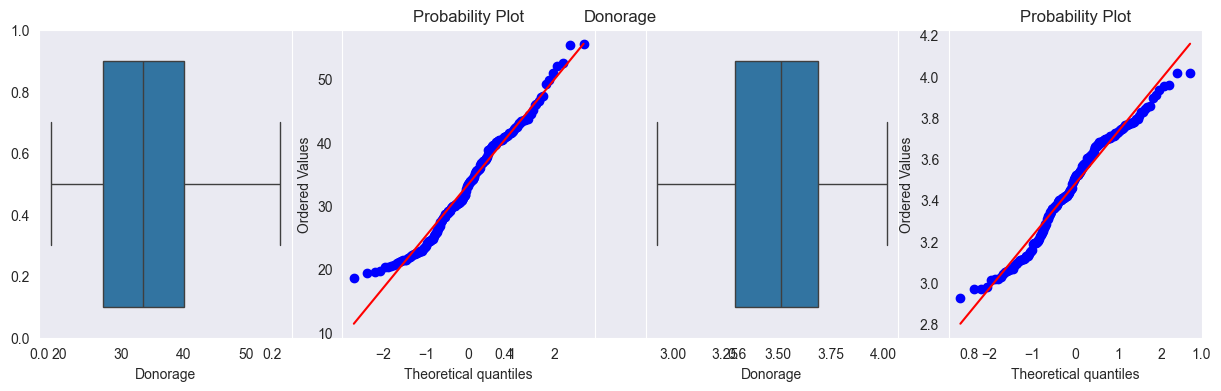

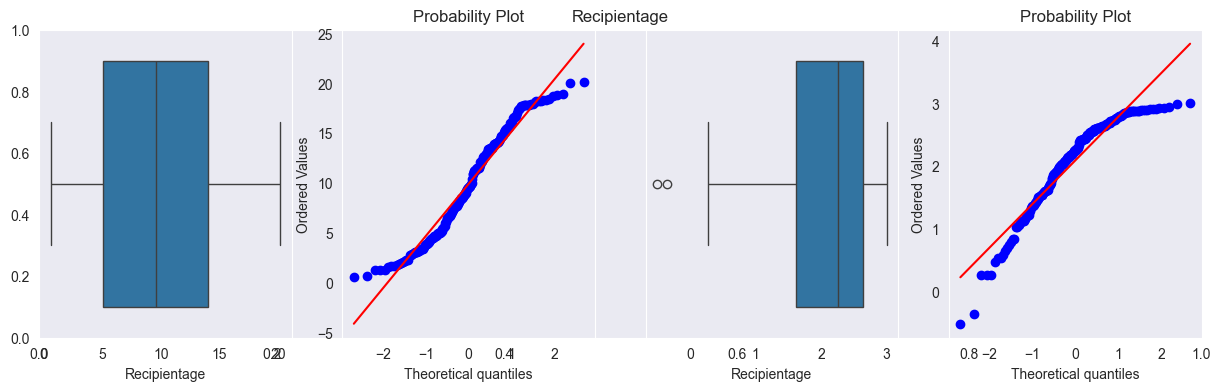

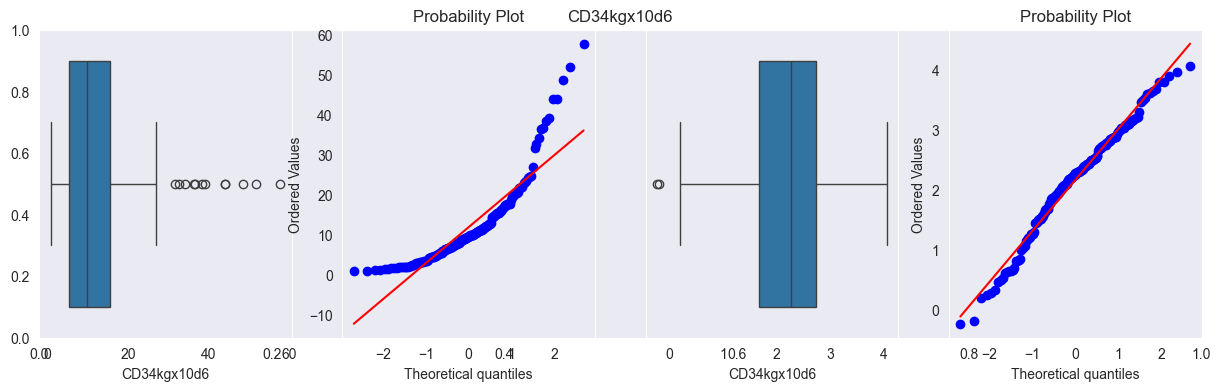

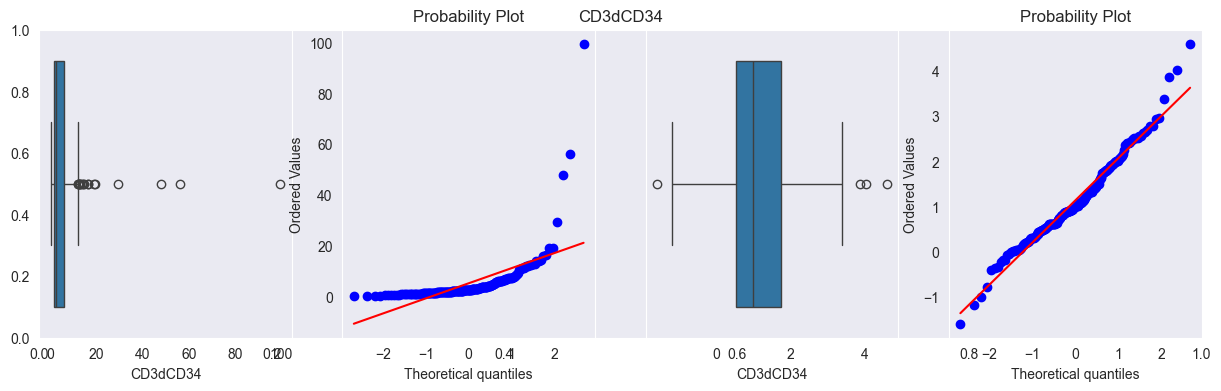

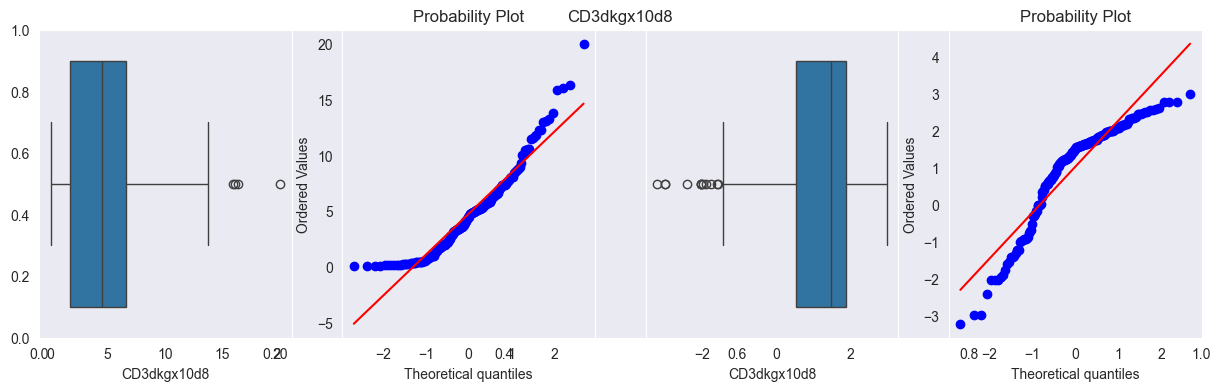

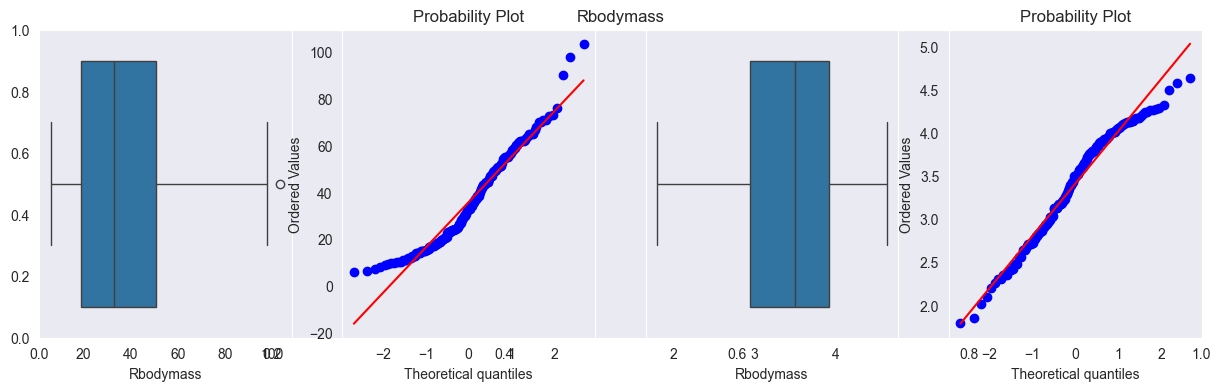

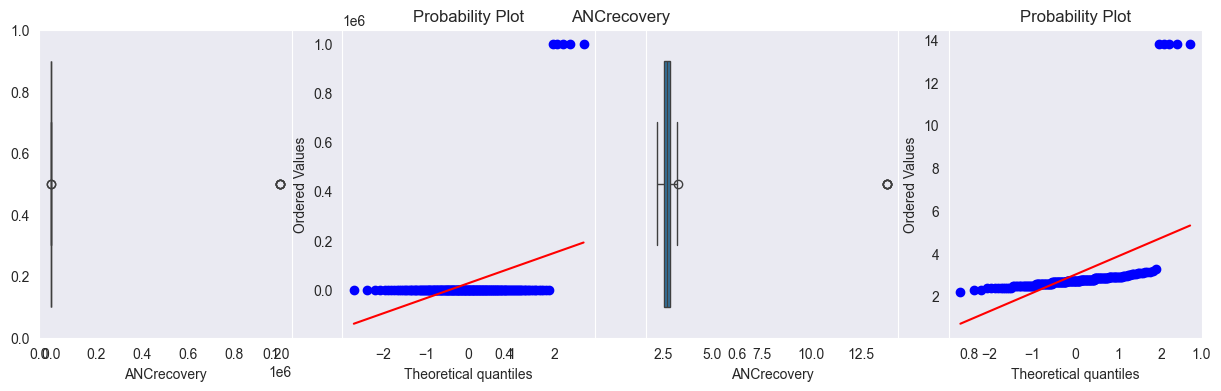

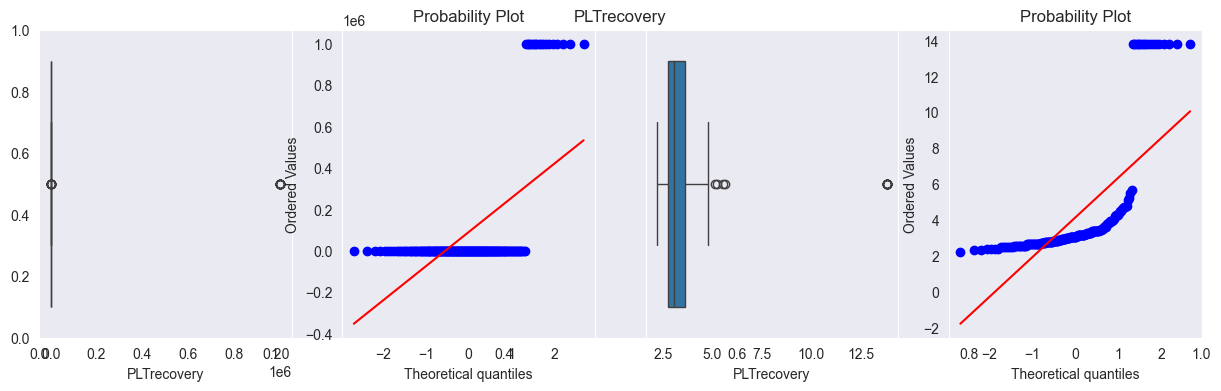

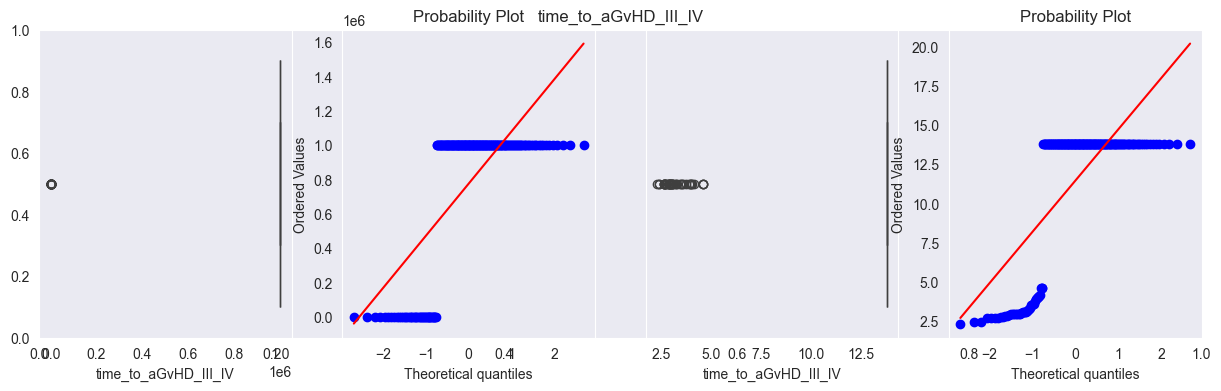

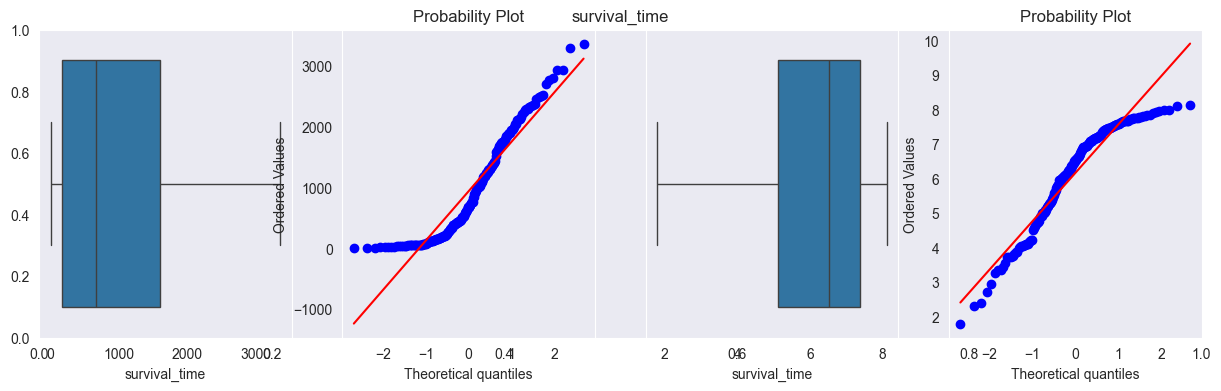

In [28]:
# plotting graph for each variables to understand outliers
# First 2 columns represent the box and prob plot of numerical features and the other 2 represents the log of the same.
from scipy import stats

sns.set_style('dark')
for col in X1[X_num.columns].describe().columns:
    plt.figure(figsize=(15,4))
    plt.title(col)
    plt.subplot(141)
    sns.boxplot(x=X1[col])
    plt.subplot(142)
    stats.probplot(x=X1[col], plot=plt)
    plt.subplot(143)
    sns.boxplot(x=np.log(X1[col]))
    plt.subplot(144)
    stats.probplot(x=np.log(X1[col]), plot=plt)
#     plt.tight_layout()
    plt.show()

In [29]:
X_num.min() # cant use log on variables with min less than 1

Donorage                18.646575
Recipientage             0.600000
CD34kgx10d6              0.790000
CD3dCD34                 0.204132
CD3dkgx10d8              0.040000
Rbodymass                6.000000
ANCrecovery              9.000000
PLTrecovery              9.000000
time_to_aGvHD_III_IV    10.000000
survival_time            6.000000
dtype: float64

### Log transformation on 'Donorage' and 'Rbodymass'
#### Donorage - 1) got normal qq plot
#### Rbodymass - 1) treated outliers 2) got normal qq plot

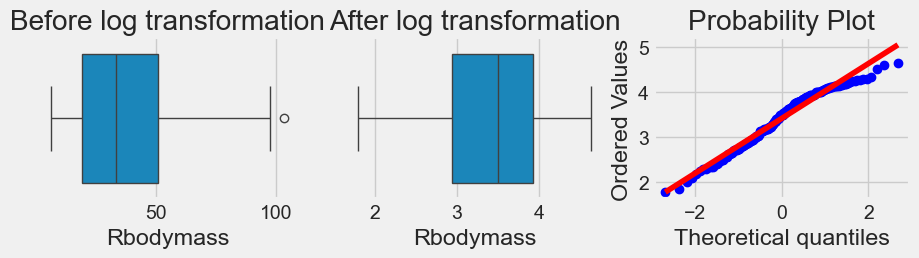

In [30]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,2))
plt.subplot(131)
sns.boxplot(x=X1['Rbodymass'])
plt.title('Before log transformation')
plt.subplot(132)
plt.title('After log transformation')
sns.boxplot(x=np.log(X1['Rbodymass']))
plt.subplot(133)
stats.probplot(x=np.log(X1['Rbodymass']), plot=plt)
plt.show()

In [31]:
# Log transformation on Donorage and Rbodymass
X1[['Donorage','Rbodymass']] = np.log(X1[['Donorage','Rbodymass']])

In [32]:
# Upper cap outlier function
def outlier_cap(x):
#     x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.95))
    return(x)

### Treating CD34kgx10d6

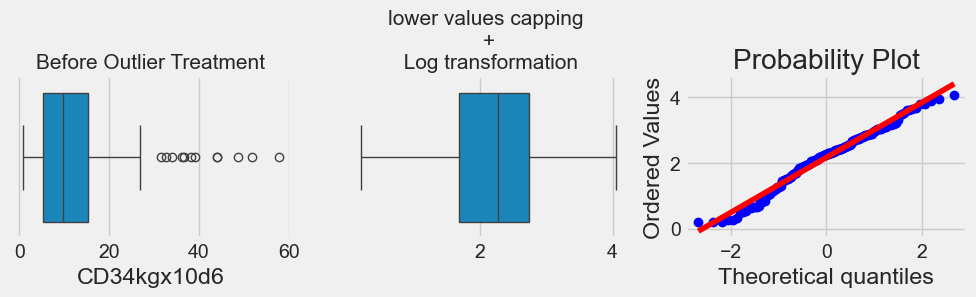

In [33]:
plt.figure(figsize=(11,2))
plt.subplot(131)
sns.boxplot(x=X1['CD34kgx10d6'])
plt.title('Before Outlier Treatment', fontsize=15)
plt.subplot(132)
plt.title("lower values capping \n+\n Log transformation", fontsize=15)
sns.boxplot(x=np.log(np.where(X1['CD34kgx10d6'] < 1, 1.22, X1['CD34kgx10d6'])))
plt.subplot(133)
stats.probplot(x=np.log(np.where(X1['CD34kgx10d6'] < 1, 1.22, X1['CD34kgx10d6'])), plot=plt)
plt.show()

In [34]:
# 'CD34kgx10d6' - Cap the 2 least values to a value just above 1 and then log transformation
X1['CD34kgx10d6'] = np.where(X1['CD34kgx10d6'] < 1, 1.22, X1['CD34kgx10d6'])

In [35]:
X1['CD34kgx10d6'] = np.log(X1['CD34kgx10d6'])

### Treating CD3dkgx10d8

In [37]:
X1['CD3dkgx10d8'].median(), X1['CD3dkgx10d8'].mean()

(4.47, 4.762508021390374)

In [38]:
np.sum(X1['CD3dCD34']<1)

12

In [39]:
X_full1 = pd.concat([X1, y], axis = 1)

In [40]:
# 81 dead out of 167 when < 10 and 4 dead out of 20 when >10
print("Survival rate when CD3 dosage is < 10: {}".format((1 - (np.mean(X_full1[X_full1['CD3dkgx10d8'] < 10]['survival_status'])))*100))
print("Survival rate when CD3 dosage is > 10: {}".format((1 - (np.mean(X_full1[X_full1['CD3dkgx10d8'] > 10]['survival_status'])))*100))

Survival rate when CD3 dosage is < 10: 51.49700598802396
Survival rate when CD3 dosage is > 10: 80.0


In [41]:
# Increasing my upper cap quantile value
def outlier_cap(x):
#     x=x.clip(lower=x.quantile(0.05))
    x=x.clip(upper=x.quantile(0.97))
    return(x)

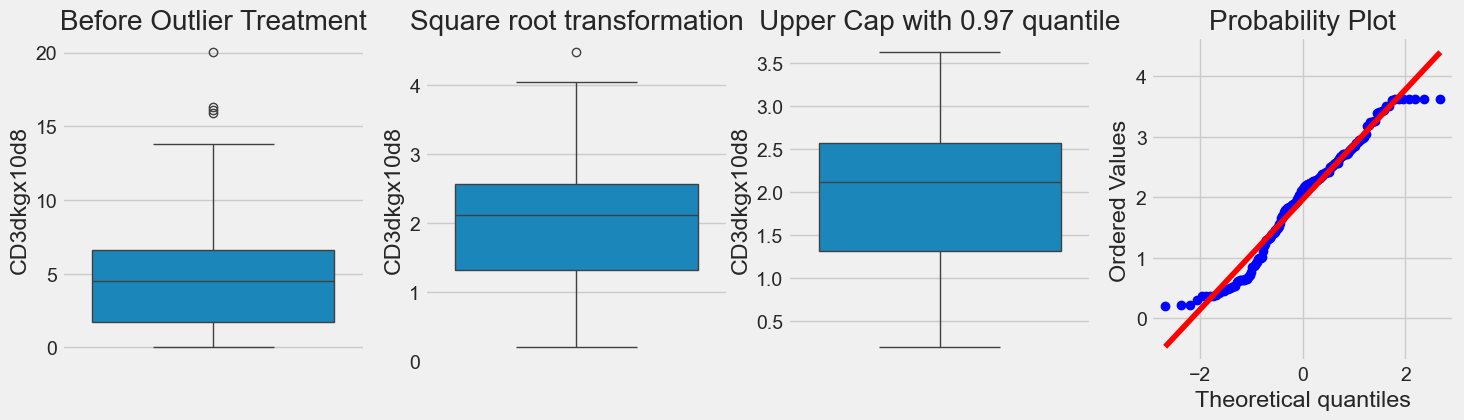

In [42]:
plt.figure(figsize=(16,4))

plt.subplot(141)
sns.boxplot(X1['CD3dkgx10d8'])
plt.title('Before Outlier Treatment')

plt.subplot(142)
sns.boxplot(np.sqrt(X1['CD3dkgx10d8']))
plt.title('Square root transformation')

plt.subplot(143)
sns.boxplot(outlier_cap(np.sqrt(X1['CD3dkgx10d8'])))
plt.title('Upper Cap with 0.97 quantile')

plt.subplot(144)
stats.probplot(outlier_cap(np.sqrt(X1['CD3dkgx10d8'])), plot=plt)
plt.show()

#### square root tranformation + upper cap on "CD3dkgx10d8"

In [43]:
# Square root transformation
X1['CD3dkgx10d8'] = np.sqrt(X1['CD3dkgx10d8'])

In [44]:
# Upper capping
X1['CD3dkgx10d8'] = outlier_cap(X1['CD3dkgx10d8'])

### Treating CD3dCD34

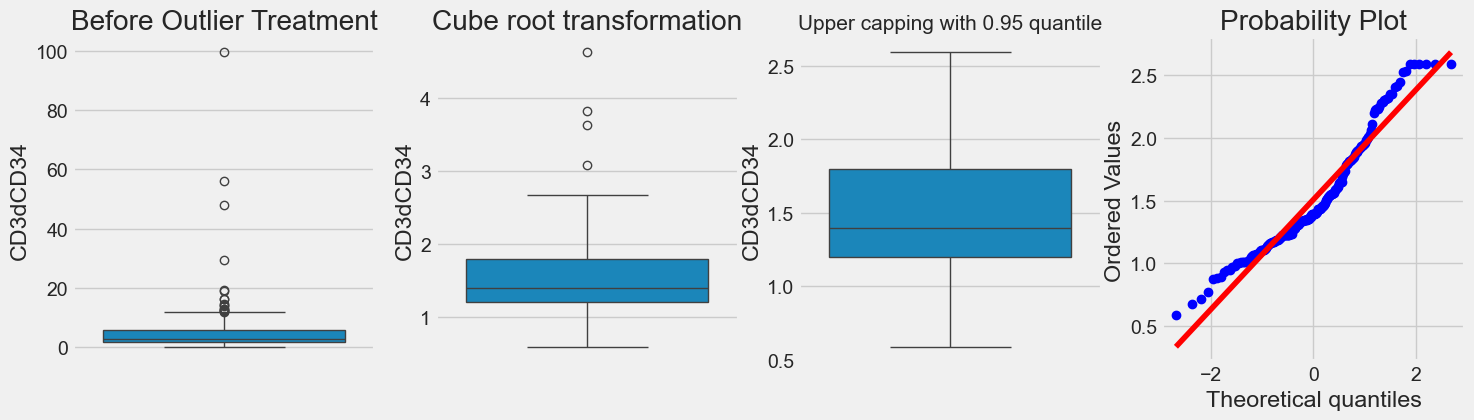

In [45]:
plt.figure(figsize=(16,4))

plt.subplot(141)
sns.boxplot(X1['CD3dCD34'])
plt.title('Before Outlier Treatment')

plt.subplot(142)
sns.boxplot(np.cbrt(X1['CD3dCD34']))
plt.title('Cube root transformation')

plt.subplot(143)
sns.boxplot(outlier_cap(np.cbrt(X1['CD3dCD34'])))
plt.title('Upper capping with 0.95 quantile', fontsize=15)

plt.subplot(144)
stats.probplot(outlier_cap(np.cbrt(X1['CD3dCD34'])), plot=plt)
plt.show()

In [46]:
# Cube root transformation and upper cap
X1['CD3dCD34'] = outlier_cap(np.cbrt(X1['CD3dCD34']))

##### The outliers in "ANCrecovery"(5 - 1M values) and "PLTrecovery" indicates that these platelets and neutrophils were never recovered.

##### "time_to_aGvHD_III_IV" (145 - 1M values)- acute graft versus host disease stage III or IV never developed into the recipient body

#### Maybe we should keep these outliers

# Summary of Outlier Treatment

##### 'Rbodymass' - log transformation

##### 'CD34kgx10d6' - Cap the 2 least values to a value just above 1 and then log transformation - Done

##### 'CD3dCD34' - Cube root transformation and upper cap

##### 'CD3dkgx10d8'- Less outliers(range is good) - sqrt tranformation + upper cap - Done

## keeping the outliers in case of ANC, PLT and time to aGvHD_III_IV

##### 'ANCrecovery' - Unreal outliers(5 - 1 M values) stating neutrophils never recovered - Min - 8; Max - 26

##### 'PLTrecovery' - Unreal outliers(17 - 1 M values) stating platelets never recovered - Min -9; Max - 285; 

##### 'time_to_aGvHD_III_IV' - Outliers are unreal(1 M values) stating patients never reached stage III or IV of acute graft versus host disease



## Outlier treatment done with X1 final df


## Feature selection

In [47]:
X1_num = X1.select_dtypes(include="number")

In [48]:
# Concatenating numerical features with the target variable
X1_num_full = pd.concat([X1_num, y], axis=1)

In [49]:
from sklearn.feature_selection import VarianceThreshold
feature_filter = VarianceThreshold(threshold=0.1)
feature_filter.fit_transform(X1_num)
features_to_keep = feature_filter.get_support(indices=True)
X1_num.iloc[:, features_to_keep].head() 
# Features with variance above threshold that is 0.1

,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,HLAmatch,Antigen,Allele,HLAgrI,Recipientage,Recipientageint,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time
0,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,9.6,1.0,1.0,1.974081,1.102134,2.319483,3.555348,19.0,51.0,32.0,999.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0,1.504077,2.229244,0.640312,3.025291,16.0,37.0,1000000.0,163.0
2,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,6.6,1.0,1.0,2.071913,2.592361,0.648074,3.152736,23.0,20.0,1000000.0,435.0
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,18.1,2.0,1.0,1.446919,2.592361,0.374166,3.912023,23.0,29.0,19.0,53.0
4,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,1.3,0.0,1.0,3.948355,1.583722,3.612478,2.197225,14.0,14.0,1000000.0,2043.0


#### Donorage had variability less than 0.1 but we cant remove donorage as we did log transformation on it so its variability decreased

### Correlation

In [50]:
X1_num_full.corr()['survival_status']

Donorage                0.046893
RecipientRh             0.130556
ABOmatch               -0.080626
CMVstatus               0.031486
DonorCMV               -0.060193
RecipientCMV            0.070048
HLAmatch                0.037013
Antigen                 0.030364
Allele                  0.040718
HLAgrI                  0.030541
Recipientage            0.203406
Recipientageint         0.142410
extcGvHD               -0.128606
CD34kgx10d6            -0.164192
CD3dCD34                0.155495
CD3dkgx10d8            -0.225010
Rbodymass               0.225651
ANCrecovery             0.181569
PLTrecovery             0.346395
time_to_aGvHD_III_IV   -0.100601
survival_time          -0.761462
survival_status         1.000000
Name: survival_status, dtype: float64

In [51]:
X1_num_full[pd.concat([X1[X_num.columns], y], axis=1).columns].corr()

,Donorage,Recipientage,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
Donorage,1.000000,0.078694,0.019255,0.128151,-0.023340,0.038613,-0.012505,-0.071950,0.012780,0.027066,0.046893
Recipientage,0.078694,1.000000,-0.445739,0.047983,-0.378806,0.921707,0.114914,0.101815,0.136641,-0.137583,0.203406
CD34kgx10d6,0.019255,-0.445739,1.000000,-0.136710,0.676237,-0.483186,-0.115417,-0.230000,0.006617,0.099021,-0.164192
CD3dCD34,0.128151,0.047983,-0.136710,1.000000,-0.741395,0.071036,0.064471,0.027036,0.004785,0.034384,0.155495
CD3dkgx10d8,-0.023340,-0.378806,0.676237,-0.741395,1.000000,-0.429155,-0.097503,-0.131788,-0.015945,0.050629,-0.225010
Rbodymass,0.038613,0.921707,-0.483186,0.071036,-0.429155,1.000000,0.112182,0.090175,0.149231,-0.128118,0.225651
ANCrecovery,-0.012505,0.114914,-0.115417,0.064471,-0.097503,0.112182,1.000000,0.524145,0.089205,-0.180974,0.181569
PLTrecovery,-0.071950,0.101815,-0.230000,0.027036,-0.131788,0.090175,0.524145,1.000000,-0.052677,-0.325751,0.346395
time_to_aGvHD_III_IV,0.012780,0.136641,0.006617,0.004785,-0.015945,0.149231,0.089205,-0.052677,1.000000,0.131168,-0.100601
survival_time,0.027066,-0.137583,0.099021,0.034384,0.050629,-0.128118,-0.180974,-0.325751,0.131168,1.000000,-0.761462


<Axes: >

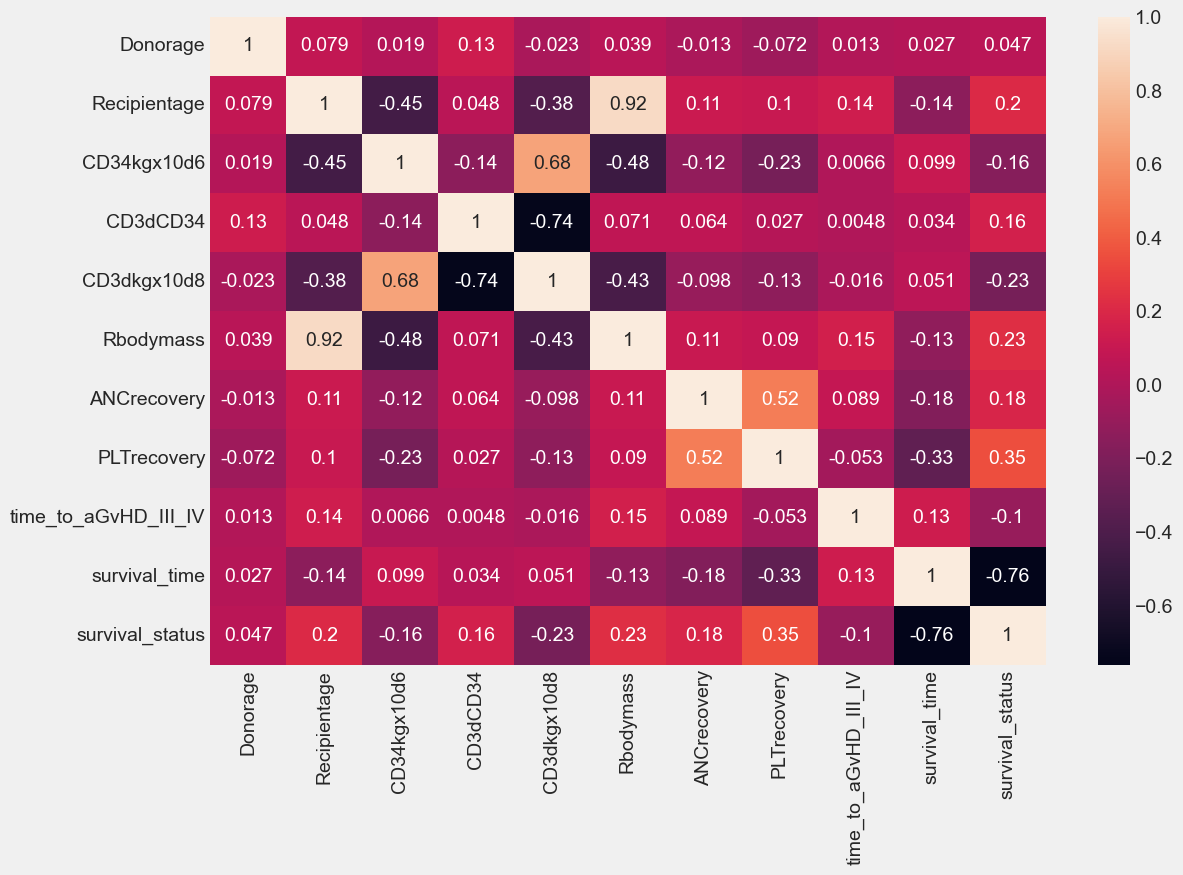

In [52]:
# Heatmap
corr = X1_num_full[pd.concat([X1[X_num.columns], y], axis=1).columns].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)

## Multicollinearity(X4)

In [53]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# numerical features
vif_df = X1_num.drop(columns=['CD3dCD34'])


features = list(vif_df.columns)
for i in range(0, len(vif_df.columns)):
    x = vif_df.loc[:,vif_df.columns!=features[i]]
    y1 = vif_df.loc[:,vif_df.columns==features[i]]
    model=sm.OLS(y1,x)
    results=model.fit()
    
    rsq=results.rsquared
    vif = round(1/(1-rsq),2)
    
    print("{} : R-sqr = {} , VIF = {}".format(features[i], rsq, vif))

Donorage : R-sqr = 0.9899827008910616 , VIF = 99.83
RecipientRh : R-sqr = 0.8683100962470018 , VIF = 7.59
ABOmatch : R-sqr = 0.7350339394683667 , VIF = 3.77
CMVstatus : R-sqr = 0.9818675857631654 , VIF = 55.15
DonorCMV : R-sqr = 0.8628358104441824 , VIF = 7.29
RecipientCMV : R-sqr = 0.9734310399521794 , VIF = 37.64
HLAmatch : R-sqr = 0.9849185696256352 , VIF = 66.31
Antigen : R-sqr = 0.9124368524994292 , VIF = 11.42
Allele : R-sqr = 0.9151760799962335 , VIF = 11.79
HLAgrI : R-sqr = 0.9569815000359401 , VIF = 23.25
Recipientage : R-sqr = 0.976884458252827 , VIF = 43.26
Recipientageint : R-sqr = 0.9573259990128014 , VIF = 23.43
extcGvHD : R-sqr = 0.8581274070008974 , VIF = 7.05
CD34kgx10d6 : R-sqr = 0.9406101474867727 , VIF = 16.84
CD3dkgx10d8 : R-sqr = 0.9099091656407647 , VIF = 11.1
Rbodymass : R-sqr = 0.9933789970615425 , VIF = 151.03
ANCrecovery : R-sqr = 0.33583150196734346 , VIF = 1.51
PLTrecovery : R-sqr = 0.4543572897015943 , VIF = 1.83
time_to_aGvHD_III_IV : R-sqr = 0.8009090339

#### Taking the vif threshold to be 10. In that case 'CD3dCD34', 'Recipientage', 'Rbodymass' has vif much greater than 10.
#### We removed 'CD3dCD34' based on multicollinearity but cant remove 'Recipientage' and 'Rbodymass', as they are theoretically important for our model.

#### Columns to drop- DonorABO, RecipientABO, HLAmismatch, Recipientage10, Recipientageint, aGvHDIIIIV_1, 'DonorABO_0', 'RecipientABO_0.0', Donorage35_1 based on theoretical understanding

In [55]:
X_final = X1.copy()

In [56]:
X_final.columns

Index(['Donorage', 'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV',
       'RecipientCMV', 'HLAmatch', 'Antigen', 'Allele', 'HLAgrI',
       'Recipientage', 'Recipientageint', 'extcGvHD', 'CD34kgx10d6',
       'CD3dCD34', 'CD3dkgx10d8', 'Rbodymass', 'ANCrecovery', 'PLTrecovery',
       'time_to_aGvHD_III_IV', 'survival_time', 'DonorABO_0', 'DonorABO_1',
       'DonorABO_2', 'RecipientABO_0.0', 'RecipientABO_1.0',
       'RecipientABO_2.0', 'Recipientgender_1', 'Stemcellsource_1',
       'Donorage35_1', 'IIIV_1', 'Gendermatch_1', 'Riskgroup_1',
       'Txpostrelapse_1', 'Diseasegroup_1', 'HLAmismatch_1',
       'Recipientage10_1', 'Relapse_1', 'aGvHDIIIIV_1'],
      dtype='object')

In [57]:
X_final.drop(columns=['DonorABO_0', 'DonorABO_1','DonorABO_2', 'RecipientABO_0.0', 'RecipientABO_1.0',
                 'RecipientABO_2.0', 'HLAmismatch_1', 'Recipientage10_1', 'Recipientageint', 'CD3dCD34',
                      'Donorage35_1'], axis=1, inplace=True)

In [58]:
X_final.columns

Index(['Donorage', 'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV',
       'RecipientCMV', 'HLAmatch', 'Antigen', 'Allele', 'HLAgrI',
       'Recipientage', 'extcGvHD', 'CD34kgx10d6', 'CD3dkgx10d8', 'Rbodymass',
       'ANCrecovery', 'PLTrecovery', 'time_to_aGvHD_III_IV', 'survival_time',
       'Recipientgender_1', 'Stemcellsource_1', 'IIIV_1', 'Gendermatch_1',
       'Riskgroup_1', 'Txpostrelapse_1', 'Diseasegroup_1', 'Relapse_1',
       'aGvHDIIIIV_1'],
      dtype='object')

In [59]:
X7 = X_final.copy()

In [60]:
# Bucketting on ANCrecovery and PLTrecovery

In [61]:
X7['ANCrecovery'] = np.where(X7['ANCrecovery']<27, 1, 0)

In [62]:
X7['ANCrecovery'].value_counts()

ANCrecovery
1    182
0      5
Name: count, dtype: int64

In [64]:
X7['PLTrecovery'] = np.where(X7['PLTrecovery']<286, 1, 0)

In [65]:
X7['PLTrecovery'].value_counts()

PLTrecovery
1    170
0     17
Name: count, dtype: int64

In [103]:
# Since we have agvhdIIIV which represents the same as 'time_to_aGvHD_III_IV' after binning
X7.drop(columns = ['time_to_aGvHD_III_IV'], axis =1, inplace = True)

In [111]:
X7 = pd.concat([X7, y], axis=1)
X7.to_csv('Final_Bone_Marrow_Bucketting.csv', index=False)

In [3]:
pd.read_csv('Final_Bone_Marrow_Bucketting.csv')

,Donorage,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,HLAmatch,Antigen,Allele,HLAgrI,...,Recipientgender_1,Stemcellsource_1,IIIV_1,Gendermatch_1,Riskgroup_1,Txpostrelapse_1,Diseasegroup_1,Relapse_1,aGvHDIIIIV_1,survival_status
0,3.128081,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,True,True,True,False,True,False,True,False,False,0
1,3.150274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,False,True,True,True,1
2,3.273156,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,False,True,True,True,1
3,3.680972,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,1
4,3.507325,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,...,False,True,False,False,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,3.626348,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,True,True,True,False,True,True,True,True,False,1
183,3.130957,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,True,False,True,1
184,3.308641,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,True,True,False,False,False,False,False,True,0
185,3.324346,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,...,True,True,True,False,False,False,True,False,False,1


In [76]:
X_final = pd.concat([X_final, y], axis=1)

In [65]:
X_final.to_csv('Final_Bone_Marrow.csv', index=False)

In [66]:
pd.read_csv('Final_Bone_Marrow.csv')

,Donorage,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,HLAmatch,Antigen,Allele,HLAgrI,...,Recipientgender_1,Stemcellsource_1,IIIV_1,Gendermatch_1,Riskgroup_1,Txpostrelapse_1,Diseasegroup_1,Relapse_1,aGvHDIIIIV_1,survival_status
0,3.128081,1.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,True,True,True,False,True,False,True,False,False,0
1,3.150274,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,False,True,True,True,1
2,3.273156,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,True,False,True,False,False,False,True,True,True,1
3,3.680972,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,False,False,True,False,False,False,True,False,False,1
4,3.507325,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1.0,1.0,...,False,True,False,False,True,False,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,3.626348,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,True,True,True,False,True,True,True,True,False,1
183,3.130957,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,True,False,True,1
184,3.308641,1.0,1.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,...,False,True,True,False,False,False,False,False,True,0
185,3.324346,1.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,...,True,True,True,False,False,False,True,False,False,1
